# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Edward

Last Name: Kang

Student ID: 912655433

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [81]:
import os
import pandas as pd
files = os.listdir("C:\\Users\\Edward\\assignment3_data\\fruit")
df = pd.DataFrame()
for f in files:
        data = pd.read_excel("C:\\Users\\Edward\\assignment3_data\\fruit" + '/' + f, header = None, skiprows = [0,1,2])
        data = data.iloc[:,:7]
        data = data.rename(columns=lambda i: ['form', 'price_per_lb', 'unit', 'yield', 'lb_per_cup', 'unit',
                                              'price_per_cup'][i])
        data = data.drop(data.columns[[2,5]], axis=1)
        x1 = pd.ExcelFile("C:\\Users\\Edward\\assignment3_data\\fruit" + '/' + f)
        a = x1.sheet_names
        data['food'] = str(a[0])
        data['type'] = 'Fruit'
        data = data[data["form"].str.startswith("Fresh") == True]
        df = df.append(data)

fruits = df
fruits.head(100)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,1.56752,0.9,0.242508,0.422373,Apples,Fruit
0,Fresh1,3.04007,0.93,0.363763,1.1891,Apricots,Fruit
0,Fresh1,0.566983,0.64,0.330693,0.292965,Bananas,Fruit
0,Fresh1,5.77471,0.96,0.31967,1.92292,Blackberries,Fruit
0,Fresh1,4.73462,0.95,0.31967,1.59318,Blueberries,Fruit
0,Fresh1,0.535874,0.51,0.374786,0.3938,Cantaloupe,Fruit
0,Fresh1,3.59299,0.92,0.341717,1.33455,Cherries,Fruit
0,Fresh1,0.897802,0.49,0.462971,0.848278,Grapefruit,Fruit
0,Fresh1,2.09383,0.96,0.330693,0.721266,Grapes,Fruit
0,Fresh1,0.796656,0.46,0.374786,0.649077,Honeydew melon,Fruit


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [82]:
files = os.listdir("C:\\Users\\Edward\\assignment3_data\\vegetables")
df = pd.DataFrame()
for f in files:
        data = pd.read_excel("C:\\Users\\Edward\\assignment3_data\\vegetables" + '/' + f, header = None, skiprows = [0,1,2])
        data = data.iloc[:,:7]
        data = data.rename(columns=lambda i: ['form', 'price_per_lb', 'unit', 'yield', 'lb_per_cup', 'unit',
                                              'price_per_cup'][i])
        data = data.drop(data.columns[[2,5]], axis=1)
        x1 = pd.ExcelFile("C:\\Users\\Edward\\assignment3_data\\vegetables" + '/' + f)
        a = x1.sheet_names
        data['food'] = str(a[0])
        data['type'] = 'vegetables'
        data = data[data["form"].str.startswith("Fresh") == True]
        df = df.append(data)
        df = df.dropna()
        
vegetables = df
vegetables.head(100)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,1.17225,0.458554,0.451948,1.155360,Acorn squash,vegetables
0,Fresh1,2.21305,0.375309,0.385809,2.274967,Artichoke,vegetables
0,Fresh1,3.21349,0.493835,0.396832,2.582272,Asparagus,vegetables
0,Fresh1,2.23587,0.740753,0.31967,0.964886,Avocado,vegetables
0,Fresh1,2.76355,1.06,0.341717,0.890898,Brussels sprouts,vegetables
0,Fresh1,1.24474,0.714,0.451948,0.787893,Butternut squash,vegetables
0,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,Cabbage,vegetables
1,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412,Cabbage,vegetables
0,Fresh1,2.63084,1.16,0.286601,0.650001,Collard greens,vegetables
0,Fresh1,2.69062,0.54,0.363763,1.812497,Corn,vegetables


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [83]:
combine = pd.concat([fruits, vegetables])
combine.head(100)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,1.56752,0.9,0.242508,0.422373,Apples,Fruit
0,Fresh1,3.04007,0.93,0.363763,1.1891,Apricots,Fruit
0,Fresh1,0.566983,0.64,0.330693,0.292965,Bananas,Fruit
0,Fresh1,5.77471,0.96,0.31967,1.92292,Blackberries,Fruit
0,Fresh1,4.73462,0.95,0.31967,1.59318,Blueberries,Fruit
0,Fresh1,0.535874,0.51,0.374786,0.3938,Cantaloupe,Fruit
0,Fresh1,3.59299,0.92,0.341717,1.33455,Cherries,Fruit
0,Fresh1,0.897802,0.49,0.462971,0.848278,Grapefruit,Fruit
0,Fresh1,2.09383,0.96,0.330693,0.721266,Grapes,Fruit
0,Fresh1,0.796656,0.46,0.374786,0.649077,Honeydew melon,Fruit


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

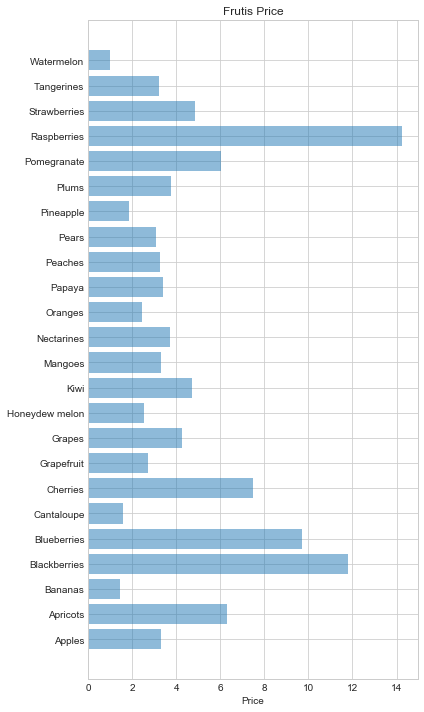

In [84]:
import matplotlib.pyplot as plt
import numpy as np

fruits['total_price'] = fruits['price_per_lb']+(fruits['price_per_cup']/fruits['lb_per_cup'])
combine['adj_price'] = combine['price_per_lb']/combine['yield']

objects = (fruits['food'])
y_pos =np.arange(len(objects))
price = (fruits['total_price'])

plt.figure(figsize=(6,10))
plt.barh(y_pos, price, align = 'center',alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Price')
plt.title('Frutis Price')
plt.tight_layout()
plt.show()

From the bar chart we can see raspberries are the most expensive, and watermelon is the least expensive.

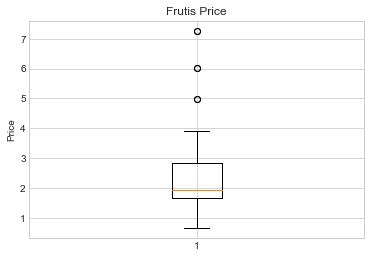

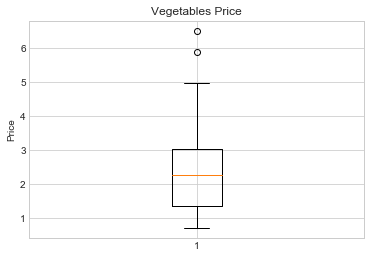

In [67]:
adj_fruitprice = fruits['adj_price'].astype(str).astype(float)
adj_vegeprice = vegetables['adj_price'].astype(str).astype(float)
plt.boxplot(adj_fruitprice)
plt.ylabel('Price')
plt.title('Frutis Price')
plt.show()
plt.boxplot(adj_vegeprice)
plt.ylabel('Price')
plt.title('Vegetables Price')
plt.show()

From the box plots we can see the price range of vegetables price is wider than the fruits price. Also, the maximum prices for vegetables are tend to be higher than the maximum price of fruits. Both fruits and vegetables have couple outliers. Furthermore, the mean of both fruits and vegetables are almost identical.

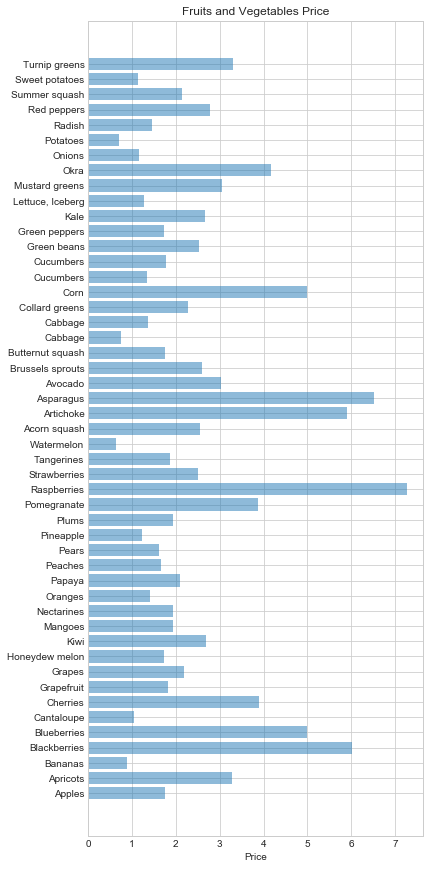

In [72]:
objects = (combine['food'])
y_pos =np.arange(len(objects))
price = (combine['adj_price'])
plt.figure(figsize=(6,15))
plt.barh(y_pos, price, align = 'center',alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Price')
plt.title('Fruits and Vegetables Price')

plt.show()

We look the price per lb after dived by the yield factor. We can see that the lowest price food have the best value, such as potatoes, cabbage, waermelon and bananas.

I am surprised that balckberries, blueberries and raspberries are all quite expensive as fruits and watermelon is the least expensive fruit. Also, the prices of aspargus, asparagus, and corns are outliers in vegetables.

From my research online, kiwi has the highest nutrition among all these fruits, and the price is about average. Furthermore, sweet potatoes is the top nutritious vegetables, and its price are below average. Therefore, in my opinion,  I expect kiwi and sweet potatoes provide the best combination of price, yield, and nutrition.